In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

This module we'll be looking at the New York City tree census. This data was provided by a volunteer driven census in 2015, and we'll be accessing it via the socrata API. The main site for the data is [here](https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh), and on the upper right hand side you'll be able to see the link to the API.

The data is conveniently available in json format, so we should be able to just read it directly in to Pandas:

In [43]:
url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=50000&$offset=0'
trees = pd.read_json(url)
trees.head(10)


,address,bbl,bin,block_id,boro_ct,borocode,boroname,brch_light,brch_other,brch_shoe,...,tree_dbh,tree_id,trnk_light,trnk_other,trunk_wire,user_type,x_sp,y_sp,zip_city,zipcode
0,108-005 70 AVENUE,4.022210e+09,4052307.0,348711,4073900,4,Queens,No,No,No,...,3,180683,No,No,No,TreesCount Staff,1.027431e+06,202756.7687,Forest Hills,11375
1,147-074 7 AVENUE,4.044750e+09,4101931.0,315986,4097300,4,Queens,No,No,No,...,21,200540,No,No,No,TreesCount Staff,1.034456e+06,228644.8374,Whitestone,11357
2,390 MORGAN AVENUE,3.028870e+09,3338310.0,218365,3044900,3,Brooklyn,No,No,No,...,3,204026,No,No,No,Volunteer,1.001823e+06,200716.8913,Brooklyn,11211
3,1027 GRAND STREET,3.029250e+09,3338342.0,217969,3044900,3,Brooklyn,No,No,No,...,10,204337,No,No,No,Volunteer,1.002420e+06,199244.2531,Brooklyn,11211
4,603 6 STREET,3.010850e+09,3025654.0,223043,3016500,3,Brooklyn,No,No,No,...,21,189565,No,No,No,Volunteer,9.909138e+05,182202.4260,Brooklyn,11215
5,8 COLUMBUS AVENUE,1.011310e+09,1076229.0,106099,1014500,1,Manhattan,No,No,No,...,11,190422,No,No,No,Volunteer,9.884187e+05,219825.5227,New York,10023
6,120 WEST 60 STREET,1.011310e+09,1076229.0,106099,1014500,1,Manhattan,No,No,No,...,11,190426,No,No,No,Volunteer,9.883112e+05,219885.2785,New York,10023
7,311 WEST 50 STREET,1.010410e+09,1086093.0,103940,1012700,1,Manhattan,No,No,No,...,9,208649,No,No,No,Volunteer,9.877691e+05,217157.8561,New York,10019
8,65 JEROME AVENUE,NaN,NaN,407443,5006400,5,Staten Island,No,No,No,...,6,209610,No,No,No,TreesCount Staff,9.630732e+05,156635.5542,Staten Island,10305
9,638 AVENUE Z,3.072350e+09,3320727.0,207508,3037402,3,Brooklyn,No,No,No,...,21,192755,No,No,No,TreesCount Staff,9.926537e+05,152903.6306,Brooklyn,11223


In [46]:
trees.health.unique()
#trees.health.head(10)

array(['Fair', 'Good', 'Poor', nan], dtype=object)

In [60]:
trees = trees.dropna()
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
# Create the dictionary 
event_dictionary ={'Fair' : 'Yellow', 'Good' : 'Green', 'Poor' : 'Red'} 
  
# Add a new column named 'Price' 
trees['Color'] = trees['health'].apply(set_value, args =(event_dictionary, ))
trees.Color.head(10)

0     Yellow
1     Yellow
2      Green
3      Green
4      Green
5      Green
6      Green
7      Green
9     Yellow
10     Green
Name: Color, dtype: object

Looks good, but lets take a look at the shape of this data:

In [34]:
trees.shape

(10000, 45)

1000 seems like too few trees for a city like New York, and a suspiciously round number. What's going on?

Socrata places a 1000 row limit on their API. Raw data is meant to be "paged" through for applications, with the expectation that a UX wouldn't be able to handle a full dataset. 

As a simple example, if we had a mobile app with limited space that only displayed trees 5 at a time, we could view the first 5 trees in the dataset with the url below:

In [4]:
firstfive_url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=5&$offset=0'
firstfive_trees = pd.read_json(firstfive_url)
firstfive_trees

,address,bbl,bin,block_id,boro_ct,borocode,boroname,brch_light,brch_other,brch_shoe,...,tree_dbh,tree_id,trnk_light,trnk_other,trunk_wire,user_type,x_sp,y_sp,zip_city,zipcode
0,108-005 70 AVENUE,4022210001,4052307,348711,4073900,4,Queens,No,No,No,...,3,180683,No,No,No,TreesCount Staff,1027431.148,202756.7687,Forest Hills,11375
1,147-074 7 AVENUE,4044750045,4101931,315986,4097300,4,Queens,No,No,No,...,21,200540,No,No,No,TreesCount Staff,1034455.701,228644.8374,Whitestone,11357
2,390 MORGAN AVENUE,3028870001,3338310,218365,3044900,3,Brooklyn,No,No,No,...,3,204026,No,No,No,Volunteer,1001822.831,200716.8913,Brooklyn,11211
3,1027 GRAND STREET,3029250001,3338342,217969,3044900,3,Brooklyn,No,No,No,...,10,204337,No,No,No,Volunteer,1002420.358,199244.2531,Brooklyn,11211
4,603 6 STREET,3010850052,3025654,223043,3016500,3,Brooklyn,No,No,No,...,21,189565,No,No,No,Volunteer,990913.775,182202.4260,Brooklyn,11215


If we wanted the next 5, we would use this url:

In [5]:
nextfive_url = 'https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$limit=5&$offset=5'
nextfive_trees = pd.read_json(nextfive_url)
nextfive_trees

,address,bbl,bin,block_id,boro_ct,borocode,boroname,brch_light,brch_other,brch_shoe,...,tree_dbh,tree_id,trnk_light,trnk_other,trunk_wire,user_type,x_sp,y_sp,zip_city,zipcode
0,8 COLUMBUS AVENUE,1.011310e+09,1076229.0,106099,1014500,1,Manhattan,No,No,No,...,11,190422,No,No,No,Volunteer,988418.6997,219825.5227,New York,10023
1,120 WEST 60 STREET,1.011310e+09,1076229.0,106099,1014500,1,Manhattan,No,No,No,...,11,190426,No,No,No,Volunteer,988311.1900,219885.2785,New York,10023
2,311 WEST 50 STREET,1.010410e+09,1086093.0,103940,1012700,1,Manhattan,No,No,No,...,9,208649,No,No,No,Volunteer,987769.1163,217157.8561,New York,10019
3,65 JEROME AVENUE,NaN,NaN,407443,5006400,5,Staten Island,No,No,No,...,6,209610,No,No,No,TreesCount Staff,963073.1998,156635.5542,Staten Island,10305
4,638 AVENUE Z,3.072350e+09,3320727.0,207508,3037402,3,Brooklyn,No,No,No,...,21,192755,No,No,No,TreesCount Staff,992653.7253,152903.6306,Brooklyn,11223


You can read more about paging using the Socrata API [here](https://dev.socrata.com/docs/paging.html)

In these docs, you'll also see more advanced functions (called `SoQL`) under the "filtering and query" section. These functions should be reminding you of SQL.

Think about the shape you want your data to be in before querying it. Using `SoQL` is a good way to avoid the limits of the API. For example, using the below query I can easily obtain the count of each species of tree in the Bronx:

In [10]:
boro = 'Brooklyn'
boro2 = 'Bronx'
s_tree = "boxelder"
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=spc_common,count(tree_id)' +\
        #'&$where=boroname=\'Bronx\'' +\
        '&$where=boroname=\'Bronx\'' +\
        '&$group=spc_common').replace(' ', '%20')

soql_url2 = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=spc_common,count(tree_id)' +\
        '&$where=boroname=\'' + boro + '\'' +\
        '&$group=spc_common').replace(' ', '%20')

soql_url3 = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=boroname,count(tree_id)' +\
        '&$where=spc_common=\'' + s_tree + '\'' +\
        '&$group=boroname').replace(' ', '%20')

print(soql_url)
print(soql_url2)
soql_trees = pd.read_json(soql_url3)
soql_trees

https://soda.demo.socrata.com/resource/4tka-6guv.json?$where=magnitude > 3.0&source=pr
https://soda.demo.socrata.com/resource/4tka-6guv.json?region=Virgin Islands region&source=pr

https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$select=spc_common,count(tree_id)&$where=boroname='Bronx'&$group=spc_common
https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$select=spc_common,count(tree_id)&$where=boroname='Brooklyn'&$group=spc_common


,boroname,count_tree_id
0,Brooklyn,14
1,Manhattan,2
2,Queens,15
3,Bronx,17
4,Staten Island,16


In [87]:
s_tree = "boxelder"
boro = "Bronx"
s_tree_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        #'&$where=spc_common=\'' + s_tree + '\'' +\
        '$select=spc_common,count(tree_id)' +\
        #'&$where=spc_common=\'littleleaf_linden\'' +\
        '&$where=spc_common=\'' + s_tree + '\'' +\
        '&boroname=\'' + boro + '\'' +\
        '&$group=spc_common').replace(' ', '%20')

print(soql_url)
print(s_tree_url)
soql_s_trees = pd.read_json(s_tree_url)
soql_s_trees

https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$select=health,count(tree_id)&$where=boroname='Brooklyn'&$group=health
https://data.cityofnewyork.us/resource/nwxe-4ae8.json?$select=spc_common,count(tree_id)&$where=spc_common='boxelder'&boroname='Bronx'&$group=spc_common


,count_tree_id,spc_common
0,17,boxelder


In [27]:
soql_trees2 = pd.read_json(soql_url2)
soql_trees2

,count_tree_id,spc_common
0,7549,NaN
1,1375,silver maple
2,80,pagoda dogwood
3,8903,littleleaf linden
4,8,American larch
...,...,...
128,603,sugar maple
129,251,Cornelian cherry
130,503,white oak
131,124,Kentucky yellowwood


In [12]:
soql_treesV2["soql_trees"].sum(axis=0)

85203

This behavior is very common with web APIs, and I think this is useful when thinking about building interactive data products. When in a Jupyter Notebook or RStudio, there's an expectation that (unless you're dealing with truly large datasets) the data you want can be brought in memory and manipulated.

Dash and Shiny abstract away the need to distinguish between client side and server side to make web development more accessible to data scientists. This can lead to some unintentional design mistakes if you don't think about how costly your callback functions are (for example: nothing will stop you in dash from running a costly model triggered whenever a dropdown is called.)

The goal of using the Socrata is to force you to think about where your data operations are happening, and not resort to pulling in the data and performing all operations in local memory.

----------

**NOTE**: One tip in dealing with URLs: you may need to replace spaces with `'%20'`. I personally just write out the url and then follow the string with a replace:

In [10]:
'https://api-url.com/?query with spaces'.replace(' ', '%20')

'https://api-url.com/?query%20with%20spaces'



<H2>New Work

In [88]:
soql_url_bak = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=health,count(tree_id)' +\
        '&$where=boroname=\'Brooklyn\'' +\
        '&$group=health').replace(' ', '%20')
soql_url = ('https://data.cityofnewyork.us/resource/nwxe-4ae8.json?' +\
        '$select=health,count(tree_id)' +\
        '&$where=spc_common=\'' + s_tree + '\'' +\
        '&boroname=\'' + boro + '\'' +\
        '&$group=health').replace(' ', '%20')
soql_treesV2 = pd.read_json(soql_url)
soql_treesV2 = soql_treesV2.rename(columns={"count_tree_id": "Total Number", "health": "Health"})

total_trees = soql_treesV2["Total Number"].sum(axis=0)
soql_treesV2["Total Number"] = 100*soql_treesV2["Total Number"]/total_trees
soql_treesV2 = soql_treesV2.round(2) 
soql_treesV2 = soql_treesV2.dropna()
#soql_treesV2.dropna(subset=['name', 'born'])
soql_treesV2

,Total Number,Health
0,94.12,Good
1,5.88,Poor


(array([0]), <a list of 1 Text xticklabel objects>)

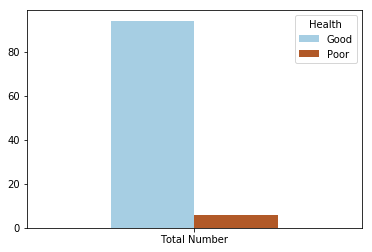

In [89]:
soql_treesV2.set_index("Health",drop=True,inplace=True)
#soql_treesV2.plot.bar()
soql_treesV2.T.plot(kind='bar', label='index', colormap='Paired')
#.xaxis.label.set_visible(False)
plt.xticks(rotation=360)

In [9]:
7549+138212+25073+6459

177293

In [41]:
soql_treesV2["count_tree_id"] = 100*soql_treesV2["count_tree_id"]/total_trees
soql_treesV2.round(2) 
soql_treesV2.dropna()

KeyError: 'count_tree_id'

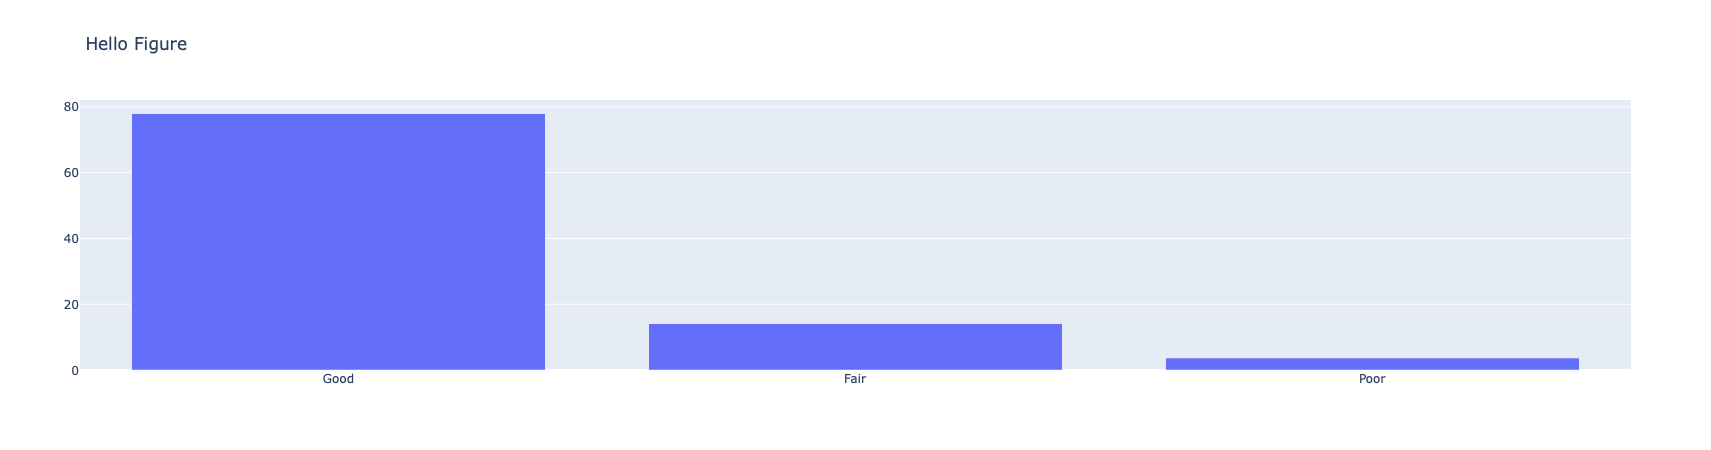

In [77]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Bar(y=soql_treesV2["Total Number"],x=soql_treesV2["Health"]))
fig.update_layout(title = 'Hello Figure')
fig.show()

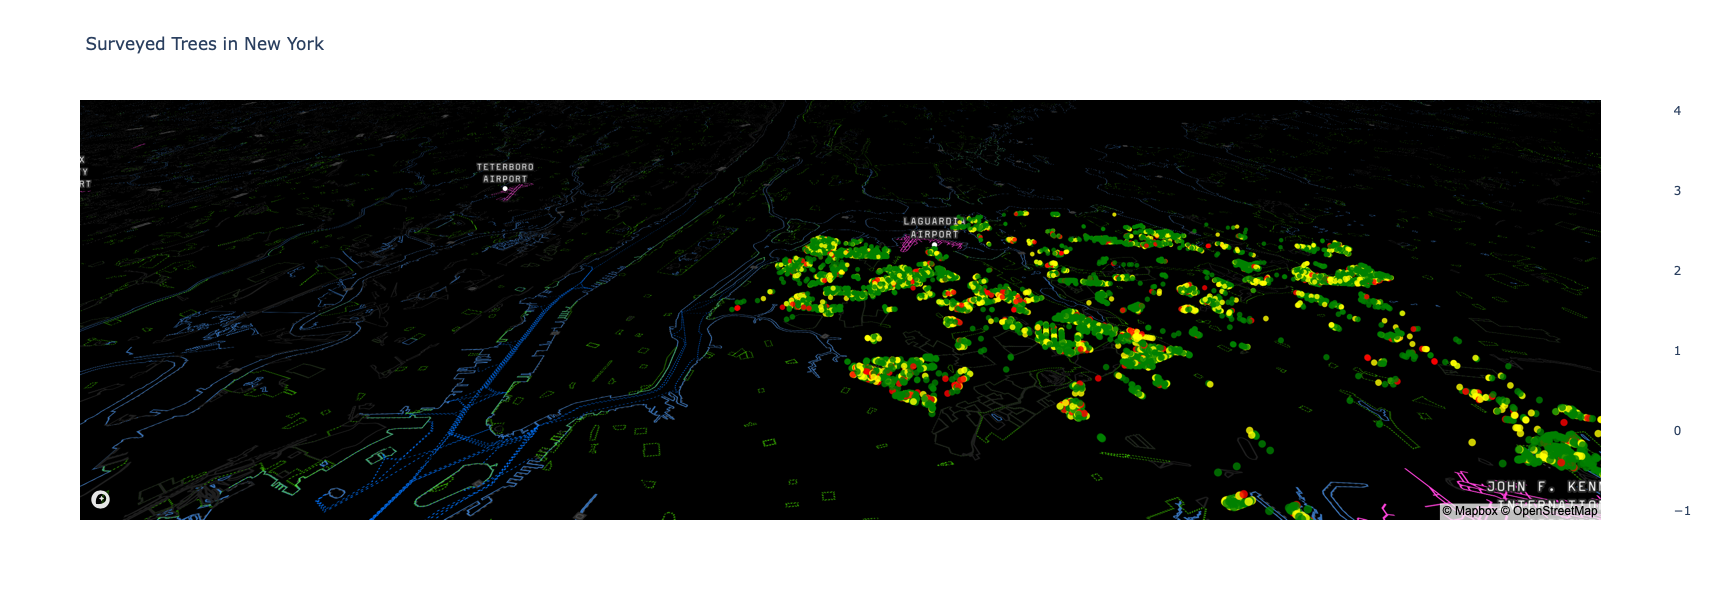

In [70]:
boro_name = 'Queens'
trees_s = trees[trees['boroname'] == boro_name]
chart_studio.tools.set_credentials_file(username='JMawyin', api_key='dVsYl2tiVcuatLpgjJjA')
from chart_studio.plotly import plot, iplot
import numpy as np 
import pandas as pd
import plotly
#import plotly.plotly as py
import chart_studio.plotly as py
from chart_studio.plotly import iplot
import plotly.offline as offline
import plotly.graph_objs as go
shaz13_custom_style = "mapbox://styles/shaz13/cjiog1iqa1vkd2soeu5eocy4i"
Token = "pk.eyJ1Ijoiam1hd3lpbiIsImEiOiJjazg4OGp0NDYwMmdwM2dxcHUxNWRhYzZyIn0.MCCGSyF0KPdvun3rTob3dw"
#set the geo=spatial data
data = [go.Scattermapbox(
            lat= trees_s['latitude'] ,
            lon= trees_s['longitude'],
            customdata = trees_s['health'],
            mode='markers',
            marker=dict(
                size= 6,
                color = trees_s['Color'] ,
                showscale=True,
                opacity = .8,
            ),
          )]
#set the layout to plot
layout = go.Layout(autosize=True,
                   mapbox= dict(accesstoken=Token,
                                bearing=10,
                                pitch=70,
                                zoom=11,
                                center= dict(lat=40.721319,
                                             lon=-73.987130),
                                style=shaz13_custom_style),
                    width=900,
                    height=600, 
                    title = "Surveyed Trees in New York")


fig = dict(data=data, layout=layout)
from plotly.offline import iplot
# your code
iplot(fig)

#https://stackoverflow.com/questions/52727937/plotly-name-iplot-is-not-defined
#https://medium.com/analytics-vidhya/introduction-to-interactive-geoplots-with-plotly-and-mapbox-9249889358eb

In [67]:
trees.steward.head(20)


0     None
1     None
2     1or2
3     None
4     None
5     1or2
6     1or2
7     None
9     None
10    None
11    None
12    None
13    3or4
14    1or2
15    3or4
16    None
17    None
18    1or2
19    1or2
20    None
Name: steward, dtype: object